In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [18]:
df = pd.read_csv('./데이터/체류거점_2021.csv')
locations = df[['latitude', 'longitude']]

## Scaling.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(locations)

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

In [14]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# 모델 인스턴스 생성
input_dim = scaled_data.shape[1]
encoding_dim = 2
autoencoder = AutoEncoder(input_dim=input_dim, encoding_dim=encoding_dim)

## 손실함수 및 최적화 함수 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

In [15]:
tensor_data = torch.tensor(scaled_data, dtype=torch.float32)
dataset = TensorDataset(tensor_data, tensor_data)
dataloader = DataLoader(dataset=dataset, batch_size=256, shuffle=True)

# 모델 훈련
num_epochs = 50
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _  = data
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss:{loss.item():.4f}")

Epoch [1/50], Loss:0.7011
Epoch [2/50], Loss:0.6363
Epoch [3/50], Loss:0.6880
Epoch [4/50], Loss:0.5969
Epoch [5/50], Loss:0.5386
Epoch [6/50], Loss:0.5514
Epoch [7/50], Loss:0.5463
Epoch [8/50], Loss:0.5916
Epoch [9/50], Loss:0.5423
Epoch [10/50], Loss:0.5323
Epoch [11/50], Loss:0.5704
Epoch [12/50], Loss:0.5262
Epoch [13/50], Loss:0.5515
Epoch [14/50], Loss:0.6140
Epoch [15/50], Loss:0.5175
Epoch [16/50], Loss:0.5398
Epoch [17/50], Loss:0.5305
Epoch [18/50], Loss:0.6156
Epoch [19/50], Loss:0.5667
Epoch [20/50], Loss:0.5880
Epoch [21/50], Loss:0.5179
Epoch [22/50], Loss:0.5520
Epoch [23/50], Loss:0.5384
Epoch [24/50], Loss:0.5392
Epoch [25/50], Loss:0.6559
Epoch [26/50], Loss:0.5793
Epoch [27/50], Loss:0.5243
Epoch [28/50], Loss:0.5638
Epoch [29/50], Loss:0.5527
Epoch [30/50], Loss:0.5319
Epoch [31/50], Loss:0.6992
Epoch [32/50], Loss:0.7112
Epoch [33/50], Loss:0.6261
Epoch [34/50], Loss:0.6237
Epoch [35/50], Loss:0.6082
Epoch [36/50], Loss:0.6637
Epoch [37/50], Loss:0.5092
Epoch [38/

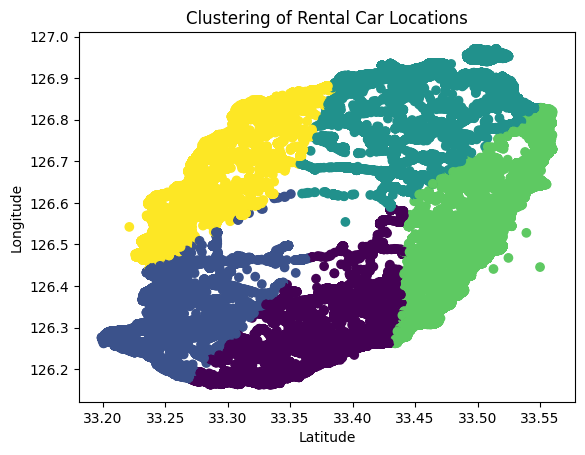

In [24]:
# 특징 추출
with torch.no_grad():
    encoded_data = autoencoder.encoder(tensor_data).numpy()

# K-Means 클러스터링
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(encoded_data)

# 클러스터링 결과를 데이터프레임에 추가
df['cluster'] = clusters

# import ace_tools as tools; tools.display_dfframe_to_user(name="Clustering Result", dfframe=df)

# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

plt.scatter(df['latitude'], df['longitude'], c=df['cluster'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering of Rental Car Locations')
plt.show()

In [ ]:
import 